# Import - Standard Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import - Dataset

In [187]:
# Import the Red Wine Quality dataset
# https://archive.ics.uci.edu/ml/datasets/wine+quality

dataset = pd.read_csv('winequality-red.csv', sep=';')

# Print the first 5 rows of the dataframe.
print(dataset.head())

# Print the shape of the dataframe
print(dataset.shape)

print(dataset['quality'].describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Data Analysis

The first steps performed by the paper was to do:
1. Pearson Correlation Analysis
2. Principal Component Analysis (PCA)
2. Shapiro-Wilk Normality Test

## Pearson Correlation Analysis

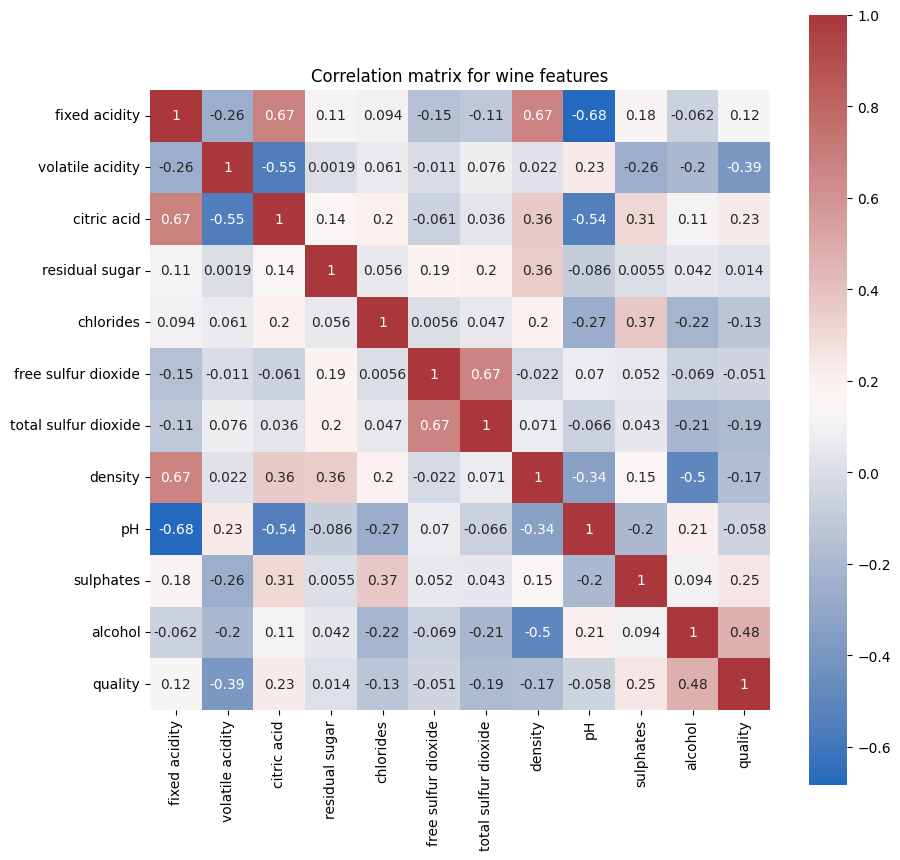

In [5]:
# Creat a correlation matrix for the wine dataset using the Pearson method
mat = dataset.corr(method='pearson', min_periods=1)

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(mat, vmax=1, square=True, annot=True, cmap='vlag')
plt.title('Correlation matrix for wine features')
plt.show()


## Principal Component Analysis (PCA)

In [6]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.iloc[:,:-1])



## Shapiro-Wiuilk Test

In [7]:
from scipy.stats import shapiro

# Conduct a Shapiro-Wilk test for normality

# Null Hypothesis: The data is normally distributed
# Alternative Hypothesis: The data is not normally distributed

# Set alpha to 0.05
alpha = 0.05


for column in dataset.columns:
    stat, p = shapiro(dataset[column])
    print(column, ': Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('The data is normally distributed (fail to reject H0)')
    else:
        print('The data is not normally distributed (reject H0)')
    #print('\n')


fixed acidity : Statistics=0.942, p=0.000
The data is not normally distributed (reject H0)
volatile acidity : Statistics=0.974, p=0.000
The data is not normally distributed (reject H0)
citric acid : Statistics=0.955, p=0.000
The data is not normally distributed (reject H0)
residual sugar : Statistics=0.566, p=0.000
The data is not normally distributed (reject H0)
chlorides : Statistics=0.484, p=0.000
The data is not normally distributed (reject H0)
free sulfur dioxide : Statistics=0.902, p=0.000
The data is not normally distributed (reject H0)
total sulfur dioxide : Statistics=0.873, p=0.000
The data is not normally distributed (reject H0)
density : Statistics=0.991, p=0.000
The data is not normally distributed (reject H0)
pH : Statistics=0.993, p=0.000
The data is not normally distributed (reject H0)
sulphates : Statistics=0.833, p=0.000
The data is not normally distributed (reject H0)
alcohol : Statistics=0.929, p=0.000
The data is not normally distributed (reject H0)
quality : Stati

# Implement the Neural Network

## Mess around with ordering

(12, 12)


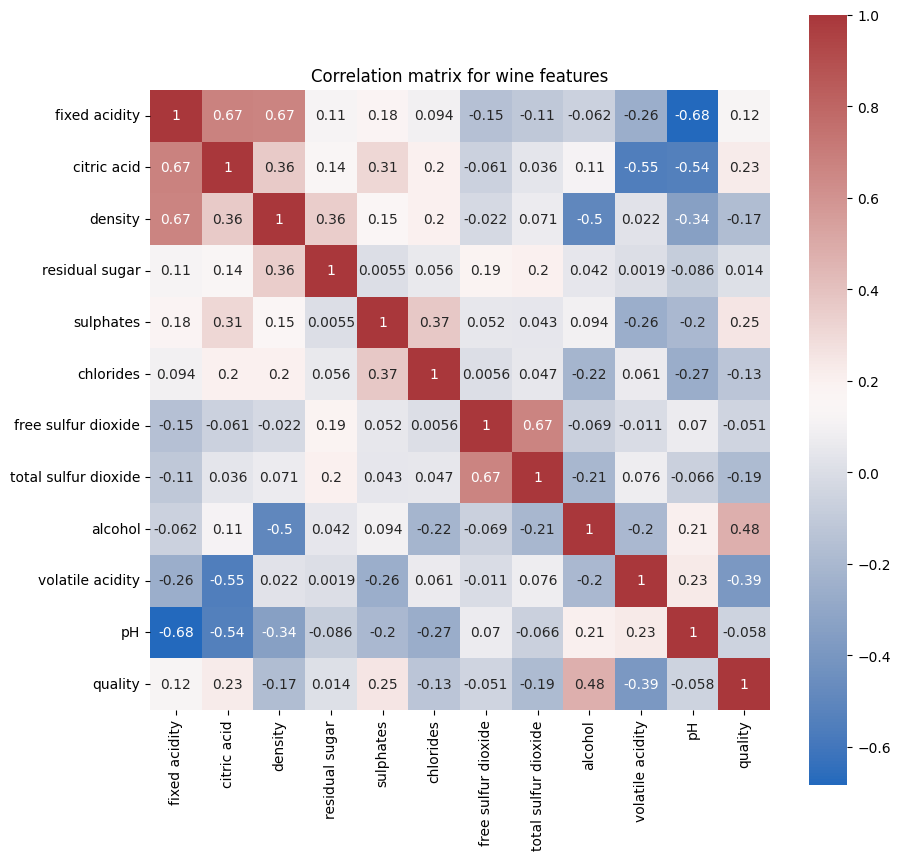

In [102]:

sort_df = dataset.loc[:, ['fixed acidity', 'citric acid', 'density', 'residual sugar', 'sulphates', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'volatile acidity', 'pH', 'quality']]
#print(sort_df)

# Creat a correlation matrix for the wine dataset using the Pearson method
mat = sort_df.corr(method='pearson', min_periods=1)

print(mat.shape)
# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(mat, vmax=1, square=True, annot=True, cmap='vlag')
plt.title('Correlation matrix for wine features')
plt.show()

In [255]:
# Create the test and train data from the sorted data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Create the features (X) and target (y) data
X = sort_df.drop('quality', axis=1)
y = sort_df['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(y), random_state=78)

# Scale the X_train and X_test data
scaler = MinMaxScaler()

# Fit the scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# # Create the SMOTE oversampling object
# smote = SMOTE(random_state=78)

# # Fit the SMOTE model to the data
# X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# # Combine the X_train smote and X_train scaled data
# X_train = np.concatenate((X_train_scaled, X_train_smote))
# y_train = np.concatenate((y_train, y_train_smote))



X_train_d = tf.expand_dims(X_train, axis=-1)
X_test_d = tf.expand_dims(X_test, axis=-1)
print(X_train_d.shape)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = tf.keras.utils.to_categorical(y_train, 10)
y_test_binary = tf.keras.utils.to_categorical(y_test, 10)

print(y_train_binary.shape)
print(y_test_binary)


(1199, 11, 1)
(1199, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Create the Neural Network

### 1DCNN

In [256]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(12, 3, activation='relu', input_shape=X_train_d.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'), # First Dense layer
    tf.keras.layers.Dropout(0.3), # First Dropout layer
    tf.keras.layers.BatchNormalization(), # First Batch normalization layer
    tf.keras.layers.Dense(512, activation='relu'), # Second Dense layer
    tf.keras.layers.Dropout(0.3), # Second Dropout layer
    tf.keras.layers.BatchNormalization(), # Second Batch normalization layer
    tf.keras.layers.Dense(256, activation='relu'), # Third Dense layer
    tf.keras.layers.Dropout(0.3), # Third Dropout layer
    tf.keras.layers.BatchNormalization(), # Third Batch normalization layer
    tf.keras.layers.Dense(64, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])


### 1DCNN-D

In [248]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(12, 3, activation='relu', input_shape=X_train_d.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'), # First Dense layer
    tf.keras.layers.Dense(512, activation='relu'), # Second Dense layer
    tf.keras.layers.Dense(256, activation='relu'), # Third Dense layer
    tf.keras.layers.Dense(64, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [257]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train_binary, epochs=35, batch_size=8, validation_data=(X_test, y_test_binary))


Epoch 1/35
150/150 [==============================] - 2s 4ms/step - loss: 1.7099 - accuracy: 0.3862 - val_loss: 1.3360 - val_accuracy: 0.4475
Epoch 2/35
150/150 [==============================] - 0s 3ms/step - loss: 1.2734 - accuracy: 0.4554 - val_loss: 1.2823 - val_accuracy: 0.4825
Epoch 3/35
150/150 [==============================] - 0s 3ms/step - loss: 1.2439 - accuracy: 0.4696 - val_loss: 1.2234 - val_accuracy: 0.4725
Epoch 4/35
150/150 [==============================] - 0s 3ms/step - loss: 1.2270 - accuracy: 0.4537 - val_loss: 1.2048 - val_accuracy: 0.4800
Epoch 5/35
150/150 [==============================] - 0s 3ms/step - loss: 1.2137 - accuracy: 0.4595 - val_loss: 1.2289 - val_accuracy: 0.4200
Epoch 6/35
150/150 [==============================] - 0s 3ms/step - loss: 1.2306 - accuracy: 0.4329 - val_loss: 1.1615 - val_accuracy: 0.4875
Epoch 7/35
150/150 [==============================] - 0s 3ms/step - loss: 1.1674 - accuracy: 0.4929 - val_loss: 1.2069 - val_accuracy: 0.4725
Epoch 

### DNN-D

In [258]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'), # First Dense layer
    tf.keras.layers.Dropout(0.3), # First Dropout layer
    tf.keras.layers.BatchNormalization(), # First Batch normalization layer
    tf.keras.layers.Dense(512, activation='relu'), # Second Dense layer
    tf.keras.layers.Dropout(0.3), # Second Dropout layer
    tf.keras.layers.BatchNormalization(), # Second Batch normalization layer
    tf.keras.layers.Dense(256, activation='relu'), # Third Dense layer
    tf.keras.layers.Dropout(0.3), # Third Dropout layer
    tf.keras.layers.BatchNormalization(), # Third Batch normalization layer
    tf.keras.layers.Dense(64, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])


In [262]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'), # First Dense layer
    tf.keras.layers.Dense(512, activation='relu'), # Second Dense layer
    tf.keras.layers.Dense(256, activation='relu'), # Third Dense layer
    tf.keras.layers.Dense(64, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [263]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train_binary, epochs=35, batch_size=8, validation_data=(X_test, y_test_binary))


Epoch 1/35
150/150 [==============================] - 1s 5ms/step - loss: 1.3640 - accuracy: 0.4487 - val_loss: 1.1979 - val_accuracy: 0.4850
Epoch 2/35
150/150 [==============================] - 0s 2ms/step - loss: 1.1603 - accuracy: 0.4754 - val_loss: 1.2273 - val_accuracy: 0.4850
Epoch 3/35
150/150 [==============================] - 0s 3ms/step - loss: 1.1525 - accuracy: 0.4871 - val_loss: 1.1719 - val_accuracy: 0.4950
Epoch 4/35
150/150 [==============================] - 0s 2ms/step - loss: 1.1319 - accuracy: 0.4971 - val_loss: 1.1850 - val_accuracy: 0.4925
Epoch 5/35
150/150 [==============================] - 0s 3ms/step - loss: 1.1171 - accuracy: 0.4946 - val_loss: 1.1811 - val_accuracy: 0.4900
Epoch 6/35
150/150 [==============================] - 0s 2ms/step - loss: 1.1148 - accuracy: 0.4987 - val_loss: 1.2226 - val_accuracy: 0.5125
Epoch 7/35
150/150 [==============================] - 0s 2ms/step - loss: 1.1113 - accuracy: 0.5163 - val_loss: 1.1992 - val_accuracy: 0.5275
Epoch 

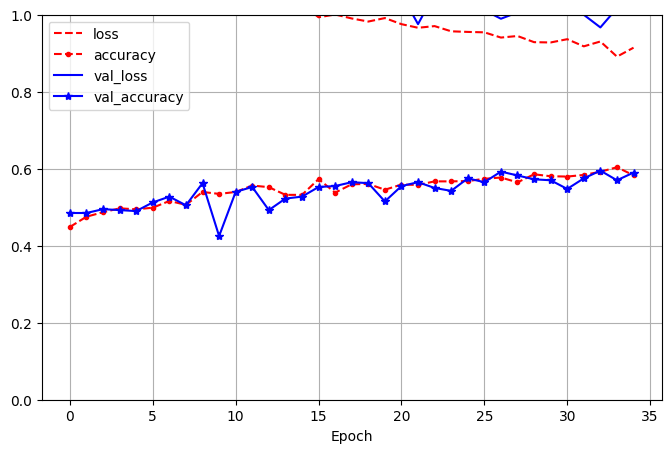

13/13 [==============================] - 0s 1ms/step


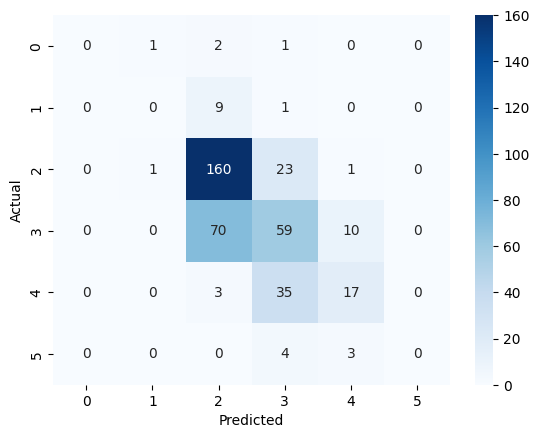

In [266]:
# Plot History of model and metrics

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch", ylim=(0, 1),
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc='upper left')
plt.show()

# Evaluate model on test data
model.evaluate(X_test, y_test_binary)

# Predict on test data
y_pred = model.predict(X_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_binary.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

